<a href="https://colab.research.google.com/github/OmerSherer/DS_EmpowerView/blob/main/ds_report/report_maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report Maker for Empowerview project 

Install gdown

In [110]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download CSVs

In [111]:
!gdown 1A9vYFy2cf_6bNJ6bZlOrGU9ME6jCoxYI
!gdown 1VZBjcPqTtY812HkuqW8hwWDF5cQBKM45
!gdown 1tmL3XBulbmBxeg0u38LLzP1deFebMVSf

Downloading...
From: https://drive.google.com/uc?id=1A9vYFy2cf_6bNJ6bZlOrGU9ME6jCoxYI
To: /content/happyvideo1ts.csv
100% 62.1M/62.1M [00:00<00:00, 194MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VZBjcPqTtY812HkuqW8hwWDF5cQBKM45
To: /content/pred2.csv
100% 31.9k/31.9k [00:00<00:00, 25.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tmL3XBulbmBxeg0u38LLzP1deFebMVSf
To: /content/interview_1_class (1).csv
100% 22.8k/22.8k [00:00<00:00, 17.5MB/s]


### Creating a timeline

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the output of the gesture recognition neural network
# You can replace this with your own code to load the output
gestures_data = pd.read_csv('/content/happyvideo1ts.csv')

In [113]:
gestures_data.head()

,timestamp,class,x1,y1,z1,v1,x2,y2,z2,v2,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,1.679047e+09,happy,0.501042,0.352644,-0.888630,0.999790,0.524491,0.309913,-0.845140,0.999762,...,0.004888,0.0,0.542127,0.312530,0.015369,0.0,0.545434,0.304507,0.016196,0.0
1,1.679047e+09,happy,0.500843,0.353403,-0.807499,0.999795,0.524346,0.310830,-0.765581,0.999765,...,0.004661,0.0,0.539867,0.311488,0.014884,0.0,0.543142,0.303597,0.015683,0.0
2,1.679047e+09,happy,0.500844,0.354894,-0.750049,0.999792,0.524456,0.312082,-0.708859,0.999757,...,0.004589,0.0,0.537067,0.312220,0.014786,0.0,0.540248,0.304258,0.015594,0.0
3,1.679047e+09,happy,0.500325,0.357623,-0.771154,0.999792,0.524064,0.314416,-0.730357,0.999754,...,0.004763,0.0,0.534880,0.312634,0.015229,0.0,0.537961,0.304895,0.016051,0.0
4,1.679047e+09,happy,0.499356,0.359131,-0.795116,0.999777,0.523208,0.315995,-0.753091,0.999724,...,0.005061,0.0,0.533695,0.313515,0.015398,0.0,0.536821,0.305756,0.016220,0.0


Extract the relevant features
We can replace these with your own features

In [114]:
timestamps = gestures_data['timestamp']
gesture_types = gestures_data['class']

Convert timestamp to seconds

In [115]:
import datetime

# Convert each timestamp to a datetime object
datetimes = [datetime.datetime.fromtimestamp(t) for t in timestamps]

# Calculate the time delta between the first timestamp and each subsequent timestamp
deltas = [(d - datetimes[0]).total_seconds() for d in datetimes]

# Convert the time deltas to a zero-indexed list of seconds
seconds = [int(delta) for delta in deltas]

print(seconds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15

Plot the timeline

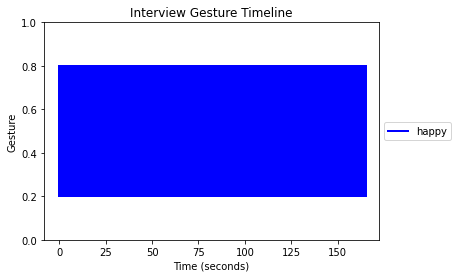

In [116]:
# Define a color palette for the gestures
colors = {'happy': 'blue', 'sad': 'green', 'insecure': 'red', 'closed': 'purple', 'open': 'orange'}

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the gestures as vertical lines at their corresponding timestamps
lines = {}
for i in range(len(seconds)):
    gesture_type = gesture_types[i]
    color = colors[gesture_type]
    if gesture_type not in lines:
        lines[gesture_type] = ax.axvline(x=seconds[i], ymin=0.2, ymax=0.8, linewidth=2, color=color, label=gesture_type)
    else:
        ax.axvline(x=seconds[i], ymin=0.2, ymax=0.8, linewidth=2, color=color)

# Set the plot title and axis labels
ax.set_title('Interview Gesture Timeline')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Gesture')

# Create a legend with the gesture types
ax.legend(lines.values(), lines.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

## Timeline with random data

In [117]:
gesture_types_arr = ['happy', 'sad', 'insecure', 'closed', 'open']
gesture_types_np = np.random.choice(gesture_types_arr, size=len(gestures_data))


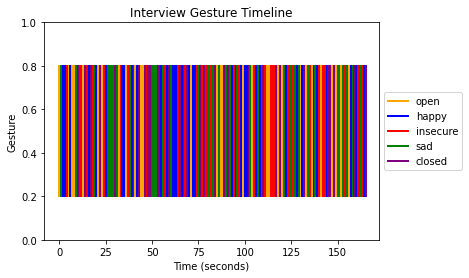

In [118]:
# Define a color palette for the gestures
colors = {'happy': 'blue', 'sad': 'green', 'insecure': 'red', 'closed': 'purple', 'open': 'orange'}

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the gestures as vertical lines at their corresponding timestamps
lines = {}
for i in range(len(seconds)):
    gesture_type = gesture_types_np[i]
    color = colors[gesture_type]
    if gesture_type not in lines:
        lines[gesture_type] = ax.axvline(x=seconds[i], ymin=0.2, ymax=0.8, linewidth=2, color=color, label=gesture_type)
    else:
        ax.axvline(x=seconds[i], ymin=0.2, ymax=0.8, linewidth=2, color=color)

# Set the plot title and axis labels
ax.set_title('Interview Gesture Timeline')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Gesture')

# Create a legend with the gesture types
ax.legend(lines.values(), lines.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

### Analayze timeline data using XGBoost

Imports

In [119]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

Load data

In [120]:
# Load the timeline data
# You can replace this with your own code to load the timeline
timeline_data = pd.read_csv('/content/happyvideo1ts.csv')

X = timeline_data['timestamp']
gesture_types = ['happy', 'sad', 'insecure', 'closed', 'open']

timeline_data['class'] = np.random.choice(gesture_types, size=len(timeline_data))
timeline_data['class'].head()
y = timeline_data['class']


In [123]:
label_encoder = LabelEncoder()

# Fit and transform the array to label-encoded classes
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
# You can adjust the test_size parameter to change the split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y))
}
model = xgb.XGBClassifier(params=params)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


[19:53:23] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.

Accuracy: 0.21580547112462006


User gives time in the interview that is interested about, we predict the gesture at this time

In [124]:


X = timeline_data['timestamp']
datetimes = [datetime.datetime.fromtimestamp(t) for t in X]
# Calculate the time delta between the first timestamp and each subsequent timestamp
deltas = [(d - datetimes[0]).total_seconds() for d in datetimes]

# Convert the time deltas to a zero-indexed list of seconds
seconds = [int(delta) for delta in deltas]
index = seconds.index(54)
X = pd.Series(data=X, index=[index])
y_pred = model.predict(X)
for pred in y_pred:
  print(gesture_types[pred])

open


## Work on second csv

In [125]:
gestures_class = pd.read_csv('/content/interview_1_class (1).csv')

gestures_class_clean = gestures_class.drop(columns="Unnamed: 0")

<Axes: >

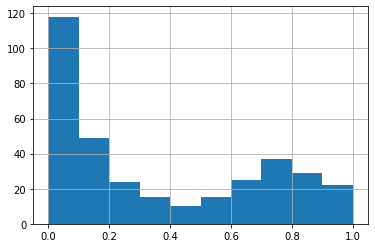

In [127]:
gestures_class_clean['heppy'].hist()

<Axes: >

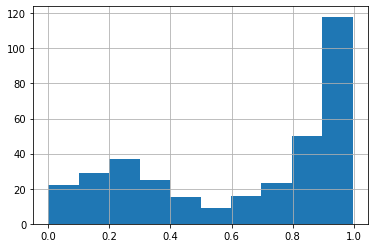

In [129]:
gestures_class_clean['sad'].hist()

<Axes: >

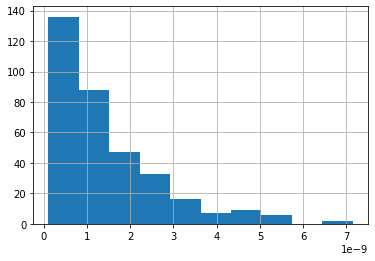

In [130]:
gestures_class_clean['open'].hist()

<Axes: >

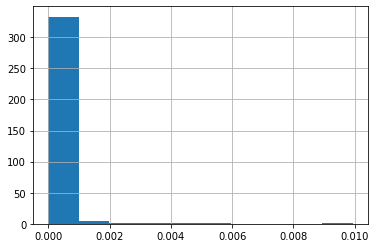

In [131]:
gestures_class_clean['insecure'].hist()

<Axes: >

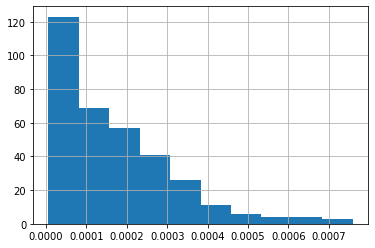

In [132]:
gestures_class_clean['closed'].hist()

Calculate the mean of probabilities, and creating new row with the most likely probability class.

In [133]:
import pandas as pd
import numpy as np

# Calculate the mean probability for each gesture
means = gestures_class_clean.mean()

# Print the mean probabilities for each gesture
print('Mean Probabilities:')
print(means)

# Determine the most likely gesture for each record
gestures_class['most_likely'] = np.argmax(gestures_class.iloc[:, 1:].values, axis=1)

# Print the most likely gesture for each record
print('Most Likely Gestures:')
print(gestures_class['most_likely'])


Mean Probabilities:
heppy       3.667190e-01
sad         6.329805e-01
insecure    1.277291e-04
closed      1.727416e-04
open        1.452761e-09
dtype: float64
Most Likely Gestures:
0      0
1      0
2      0
3      0
4      0
      ..
339    1
340    1
341    0
342    0
343    0
Name: most_likely, Length: 344, dtype: int64


Plot the most likely gestures during the interview

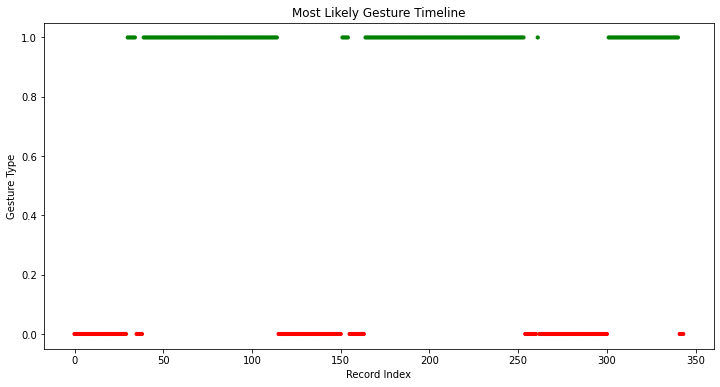

In [136]:
# Define a color mapping dictionary
gesture_colors = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'orange',
    4: 'purple'
}

# Create a new figure and set the size
plt.figure(figsize=(12,6))

# Create a scatter plot of the most likely gesture over time
plt.scatter(gestures_class.index, gestures_class['most_likely'], s=10, c=gestures_class['most_likely'].map(gesture_colors))

# Set the title and axis labels
plt.title('Most Likely Gesture Timeline')
plt.xlabel('Record Index')
plt.ylabel('Gesture Type')

# Display the graph
plt.show()

Print the most likely gesture in all of the video

In [137]:
# Count the number of occurrences of each gesture
gesture_counts = gestures_class['most_likely'].value_counts()

# Print the most likely gesture and its count
most_likely_gesture = gesture_counts.index[0]
print(f"The most likely gesture is '{most_likely_gesture}' with {gesture_counts[most_likely_gesture]} occurrences.")


The most likely gesture is '1' with 216 occurrences.
